In [1]:
from spectral_cube import SpectralCube
from astropy import units as u
import pyspeckit

In [2]:
import pylab as pl
pl.style.use('default')
pl.rcParams['figure.dpi'] = 600
pl.rcParams['savefig.dpi'] = 600

In [3]:
cd /orange/adamginsburg/w51/vla/19A-254/derod/

/orange/adamginsburg/w51/vla/19A-254/derod


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(xval, a, FWHM, VLSR):
    return (a*(np.exp(-np.log(2)*(((xval-VLSR)**2)/((0.5*FWHM)**2)))))

def overplot_gauss(a, FWHM, VLSR, xmin, xmax, ymax, line):
    
    # a_77_3    = 1.70   #S in Jy
    # FWHM_77_3   = 1.46 #line width in km s-1
    # rest_77_3 = 45.60  #LSR in km s-1
    
    xval = cube.spectral_axis.value

    fig = pl.figure(figsize=(8,6))

    sp.plotter(color='black', xmin=xmin, xmax=xmax, ymin=0, ymax=ymax, figure=fig)

    pl.title('W51North Deal v. Henkel '+'NH3 '+line, fontname="Times New Roman")
    pl.xlabel('Velocity (km s-1)', fontname="Times New Roman")
    pl.ylabel('S (Jy)',fontname="Times New Roman")

    pl.plot(xval, np.array(cube[:, y, x].value), label="Deal")

    pl.plot(xval, gaussian(xval, a, FWHM, VLSR),color='blue', label="Henkel, 2012")
    pl.legend()
    
    return



divide by zero encountered in long_scalars
Cube is a Stokes cube, returning spectral cube for I component
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'lower' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.
support for accessing str attributes such as 'title' from PhysicalType instances is deprecated since 4.3 and will be removed in a subsequent release.


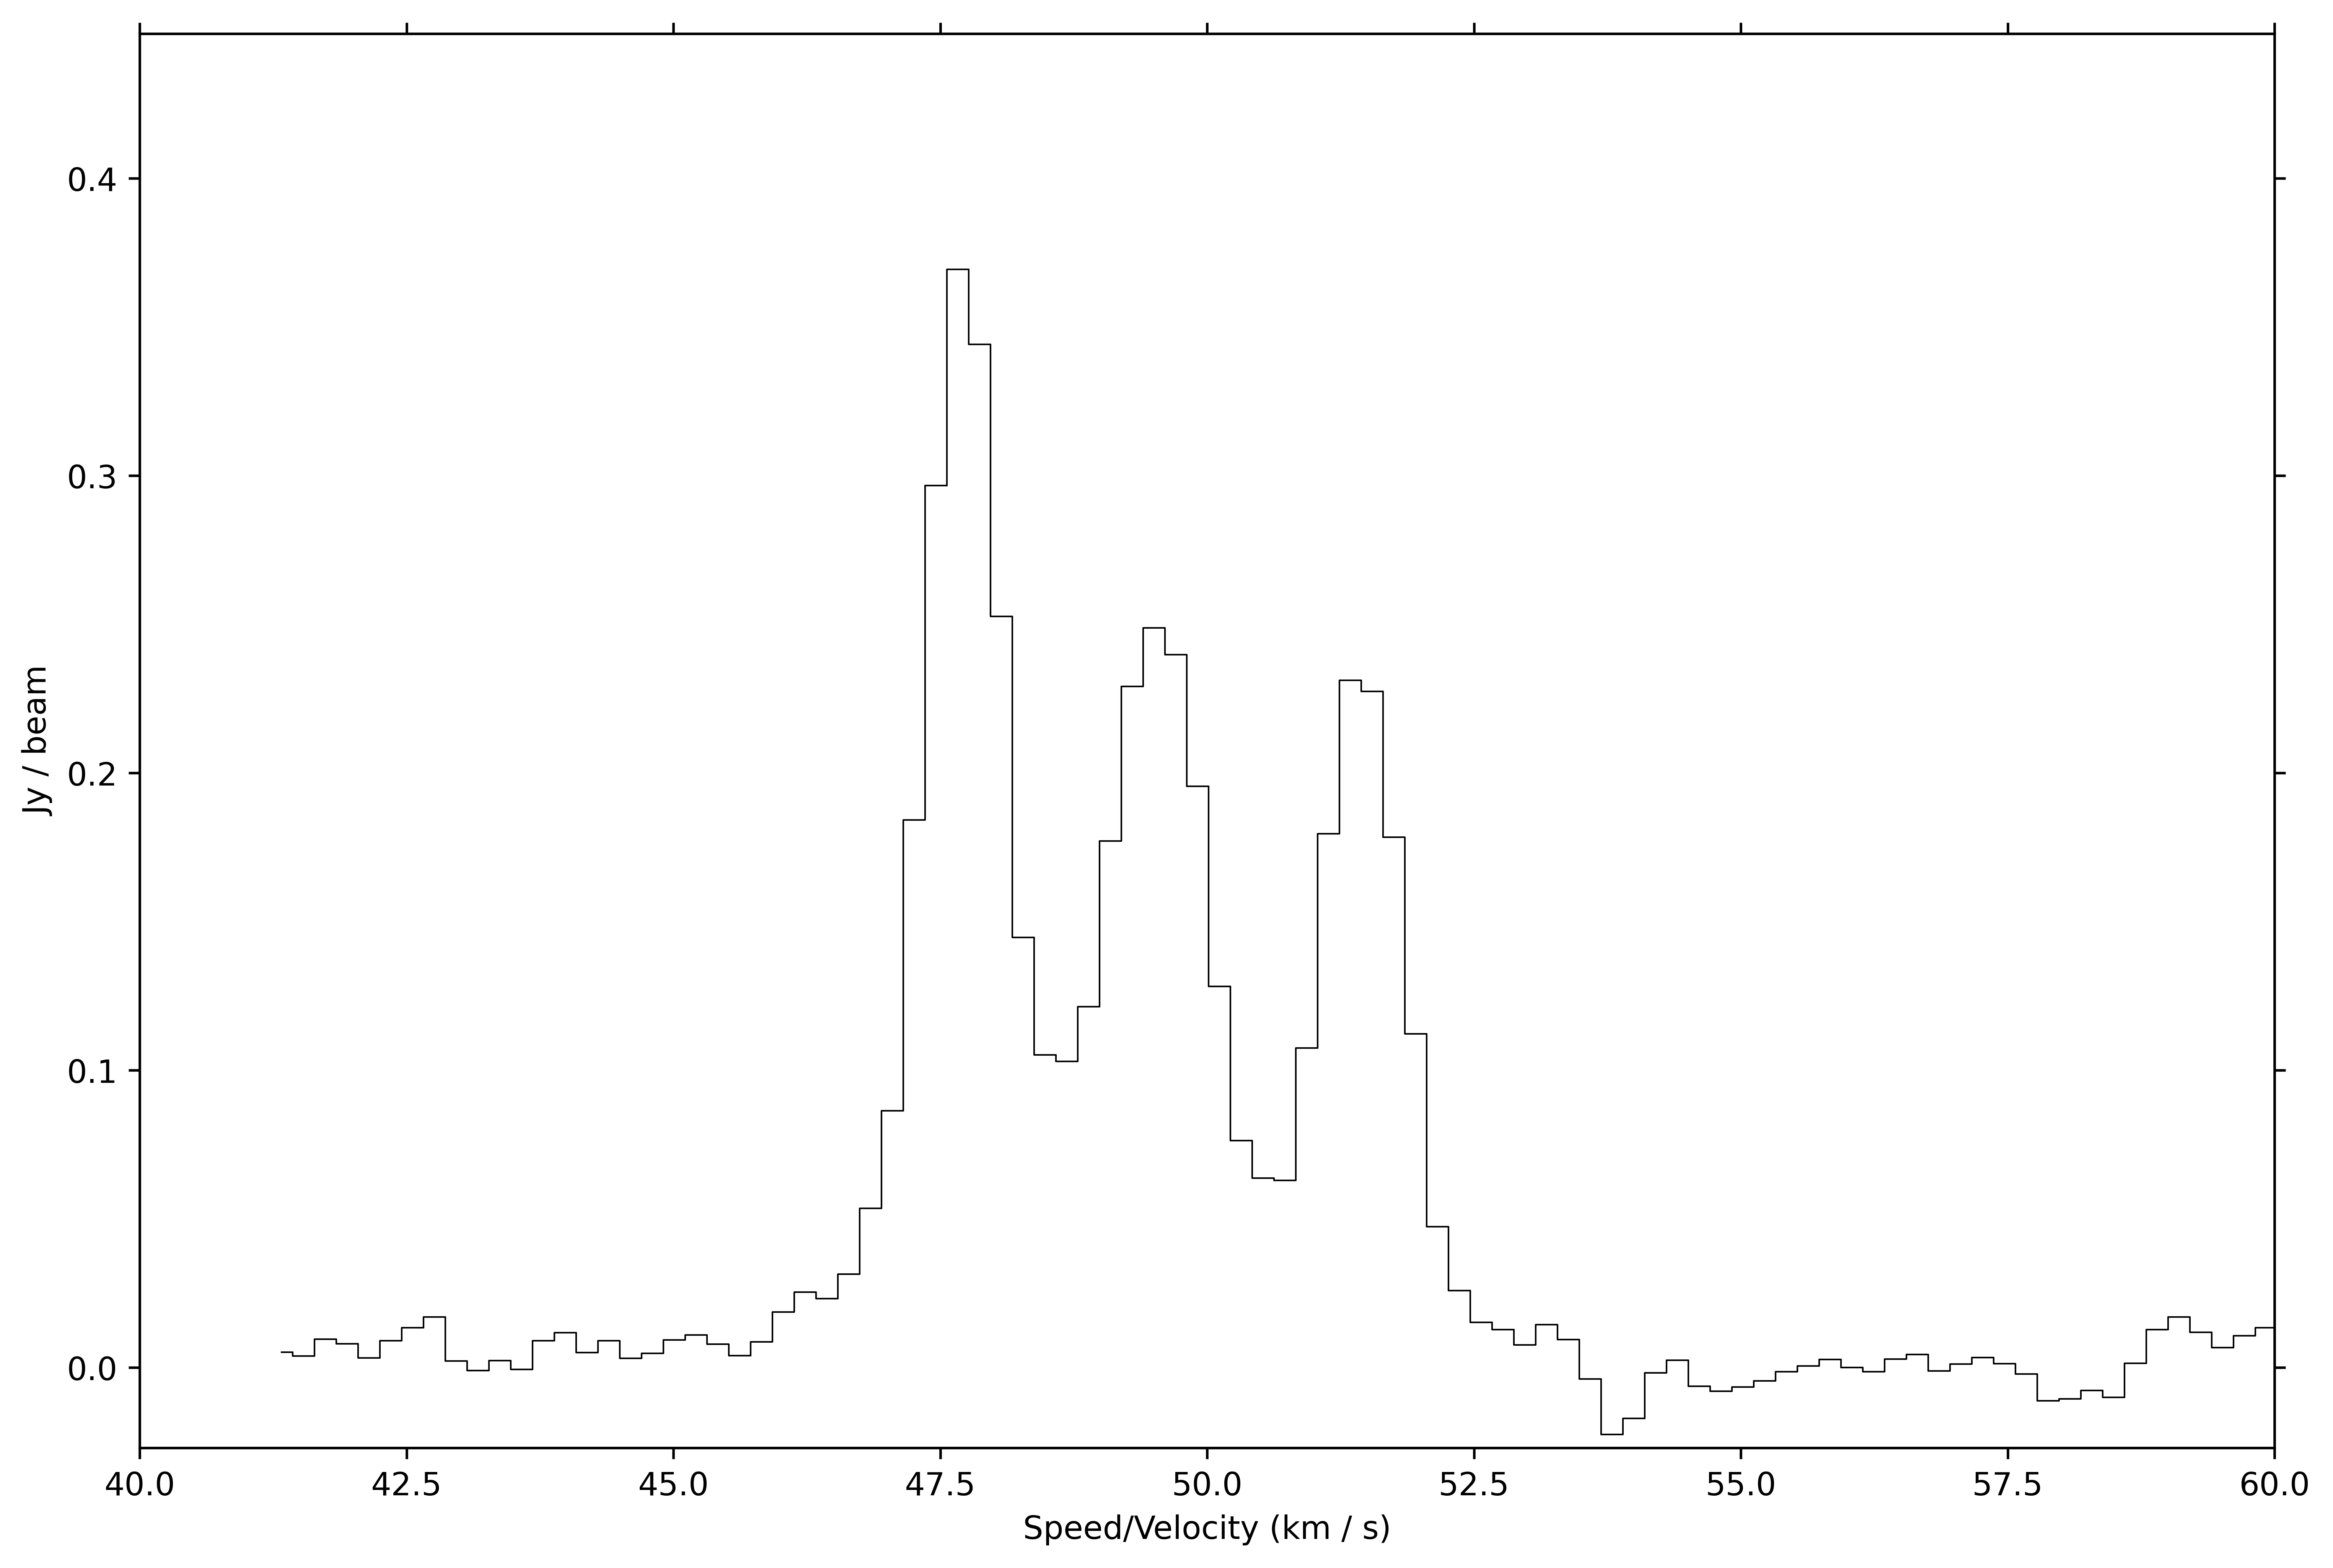

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


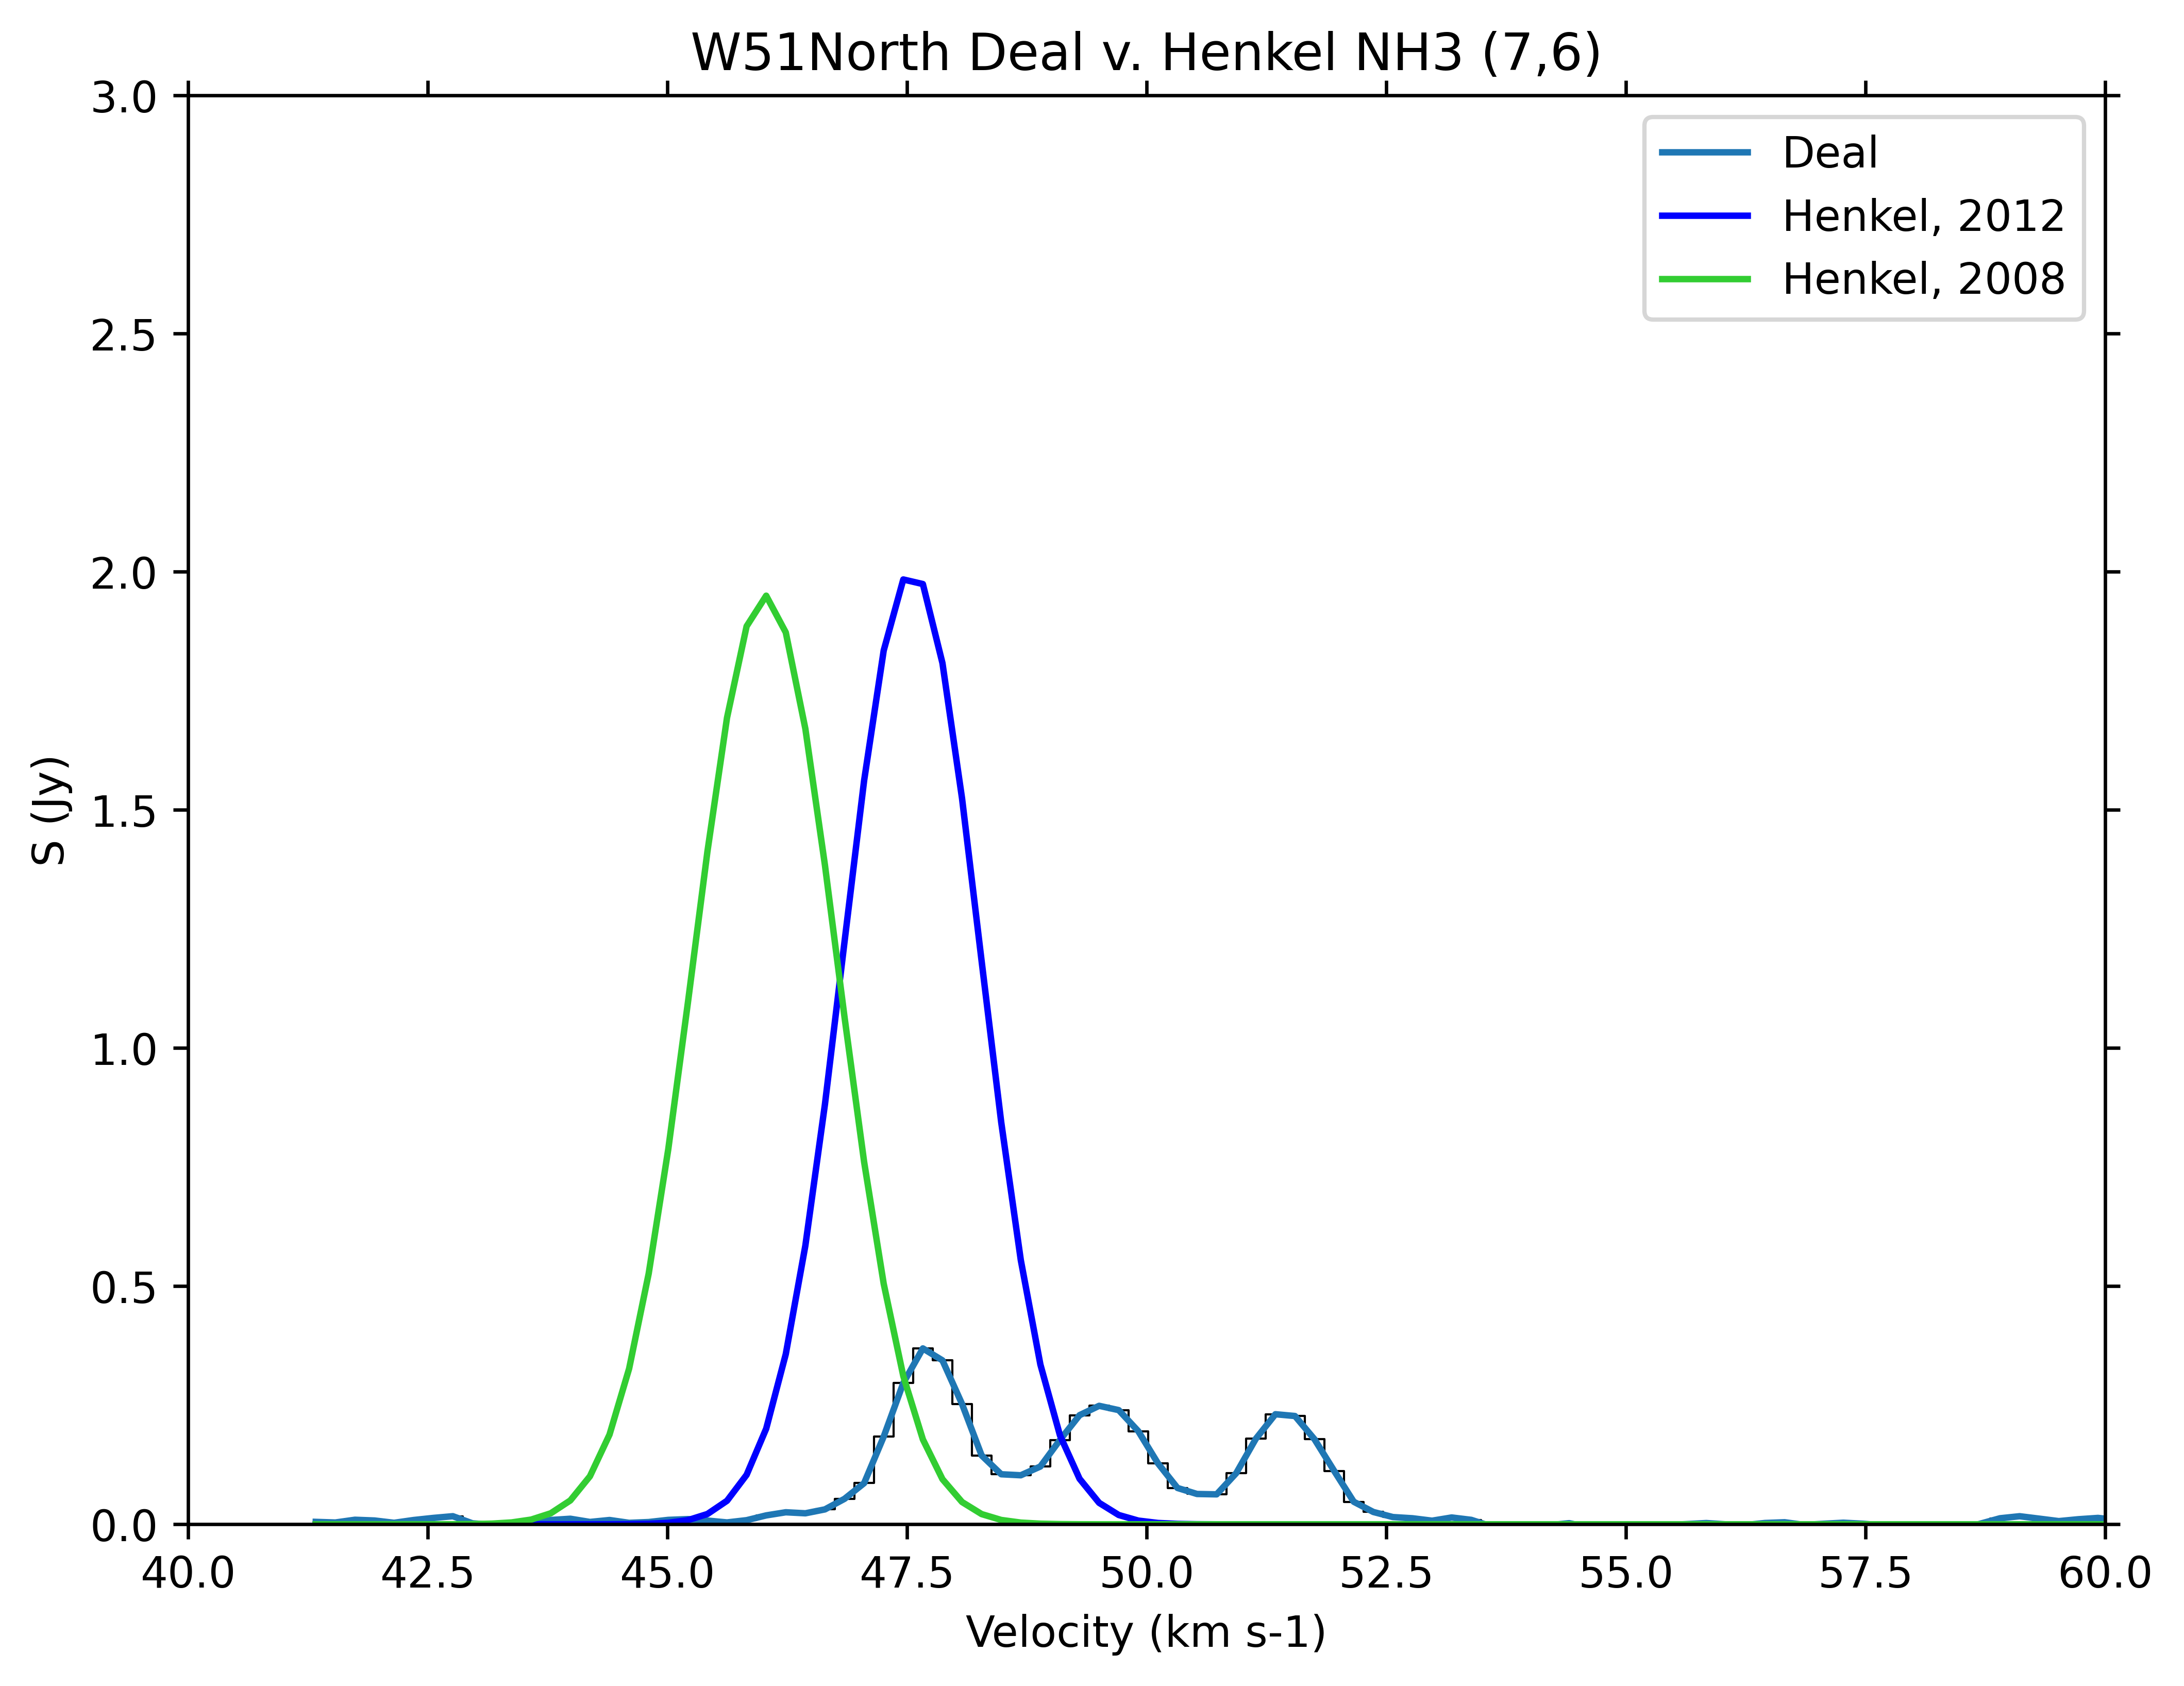

In [5]:
cube = SpectralCube.read('W51North_spw_6_corrected11_1.image', format='casa_image')

rest = 22.92494 #rest frequency in GHz

cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio', rest_value=rest * u.GHz)
y, x = 215, 144

sp = pyspeckit.Spectrum(xarr=cube.spectral_axis, data=cube[:, y, x])
fig = pl.figure(figsize=(12,8))

sp.plotter(color='black', xmin=40, xmax=60, figure=fig)
xval = cube.spectral_axis.value

rest  = 22.92494 #rest frequency in GHz
a     = 2.00     #S in Jy
FWHM  = 1.67     #line width in km s-1
VLSR  = 47.55    #LSR in km s-1

overplot_gauss(a,FWHM,VLSR,40,60,3,'(7,6)')
pl.plot(xval, gaussian(xval, 1.95, 1.77, 46.02),color='limegreen', label="Henkel, 2008")
pl.legend()